<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#介绍" data-toc-modified-id="介绍-0.1">介绍</a></span></li><li><span><a href="#知识点" data-toc-modified-id="知识点-0.2">知识点</a></span></li></ul></li><li><span><a href="#PyTorch-基础语法" data-toc-modified-id="PyTorch-基础语法-1">PyTorch 基础语法</a></span><ul class="toc-item"><li><span><a href="#张量" data-toc-modified-id="张量-1.1">张量</a></span></li><li><span><a href="#操作" data-toc-modified-id="操作-1.2">操作</a></span></li><li><span><a href="#NumPy-转换" data-toc-modified-id="NumPy-转换-1.3">NumPy 转换</a></span></li><li><span><a href="#CUDA-张量（N卡专属）" data-toc-modified-id="CUDA-张量（N卡专属）-1.4">CUDA 张量（N卡专属）</a></span></li></ul></li><li><span><a href="#Autograd-自动求导" data-toc-modified-id="Autograd-自动求导-2">Autograd 自动求导</a></span><ul class="toc-item"><li><span><a href="#梯度" data-toc-modified-id="梯度-2.1">梯度</a></span></li><li><span><a href="#神经网络" data-toc-modified-id="神经网络-2.2">神经网络</a></span><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-2.2.1">损失函数</a></span></li><li><span><a href="#反向传播" data-toc-modified-id="反向传播-2.2.2">反向传播</a></span></li></ul></li><li><span><a href="#更新权重" data-toc-modified-id="更新权重-2.3">更新权重</a></span></li></ul></li><li><span><a href="#训练一个分类器" data-toc-modified-id="训练一个分类器-3">训练一个分类器</a></span><ul class="toc-item"><li><span><a href="#读取和归一化-CIFAR10" data-toc-modified-id="读取和归一化-CIFAR10-3.1">读取和归一化 CIFAR10</a></span></li><li><span><a href="#定义-CNN" data-toc-modified-id="定义-CNN-3.2">定义 CNN</a></span></li><li><span><a href="#定义损失函数与优化器" data-toc-modified-id="定义损失函数与优化器-3.3">定义损失函数与优化器</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-3.4">训练模型</a></span></li><li><span><a href="#在测试集上测试网络" data-toc-modified-id="在测试集上测试网络-3.5">在测试集上测试网络</a></span></li></ul></li><li><span><a href="#实验总结" data-toc-modified-id="实验总结-4">实验总结</a></span></li></ul></div>

### 介绍

PyTorch 是由 Facebook 主导开发的深度学习框架，因其高效的计算过程以及良好的易用性被诸多大公司和科研人员所喜爱。本次实验中，我们将学习 PyTorch 的基础语法，了解 Autograd 自动求导机制，并最终利用 PyTorch 构建可用于图像分类任务的人工神经网络。

### 知识点

- PyTorch 基础语法
- Autograd 自动求导
- 神经网络分类器

<div class="alert alert-warning">
   <font size=4><b>课程说明</b></font>
  <p>本次课程基于 PyTorch 官方提供的 <a href="https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html"><i class="fa fa-external-link-square" aria-hidden="true"> 基础入门教程编译制作</i></a>，原内容使用
    <a href="https://github.com/pytorch/tutorials/blob/master/LICENSE"><i class="fa fa-external-link-square" aria-hidden="true"> BSD 3-Clause</i></a> 授权协议，编译后内容沿用该授权协议但需添加蓝桥云课作为编译机构署名。
  </p>
</div>

## PyTorch 基础语法

### 张量

In [1]:
# %% 未初始化的张量矩阵
import torch

torch.empty(5, 3)

tensor([[1.0837e-38, 8.4490e-39, 8.9082e-39],
        [1.0378e-38, 8.9082e-39, 4.1328e-39],
        [9.6429e-39, 9.9184e-39, 9.0000e-39],
        [1.0561e-38, 1.0653e-38, 4.1327e-39],
        [8.9082e-39, 9.8265e-39, 9.4592e-39]])

In [2]:
# %% 随机初始化
torch.rand(5, 3)

tensor([[0.6798, 0.2181, 0.8032],
        [0.6154, 0.6900, 0.4371],
        [0.0711, 0.9696, 0.6884],
        [0.1598, 0.3508, 0.1489],
        [0.1722, 0.2482, 0.3071]])

In [3]:
# %% 零填充矩阵
torch.zeros(5, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [4]:
# %% 现有数据初始化
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [5]:
# %% 默认复制全部属性
x = x.new_ones(5, 3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [6]:
# %% 仅覆盖数据类型
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.6513,  1.5956,  0.9458],
        [ 0.0206,  0.2500,  0.1933],
        [ 0.0151,  0.0250,  0.1983],
        [-0.2062,  0.8894,  0.6387],
        [-1.6906, -1.5030,  1.3396]])

In [7]:
# %% 它是函数（NumPy 自身是 Tuple），返回 Tuple 或 int
x.size()

torch.Size([5, 3])

### 操作

In [8]:
# %% 加法
y = torch.rand(5, 3)
x + y

tensor([[ 1.3229,  2.3604,  1.6521],
        [ 0.6647,  0.8935,  0.3717],
        [ 0.9353,  0.0835,  0.4860],
        [ 0.4718,  1.0521,  1.2033],
        [-1.5187, -1.1743,  1.8866]])

In [9]:
# %% 加法
torch.add(x, y)

tensor([[ 1.3229,  2.3604,  1.6521],
        [ 0.6647,  0.8935,  0.3717],
        [ 0.9353,  0.0835,  0.4860],
        [ 0.4718,  1.0521,  1.2033],
        [-1.5187, -1.1743,  1.8866]])

In [10]:
# %% 指定输出位置
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[ 1.3229,  2.3604,  1.6521],
        [ 0.6647,  0.8935,  0.3717],
        [ 0.9353,  0.0835,  0.4860],
        [ 0.4718,  1.0521,  1.2033],
        [-1.5187, -1.1743,  1.8866]])

In [11]:
# %% "+=" 效果，带下划线后缀的方法都会改变张量自身
y.add_(x)
y

tensor([[ 1.3229,  2.3604,  1.6521],
        [ 0.6647,  0.8935,  0.3717],
        [ 0.9353,  0.0835,  0.4860],
        [ 0.4718,  1.0521,  1.2033],
        [-1.5187, -1.1743,  1.8866]])

In [12]:
# %% 索引方式与 NumPy 相同
x[:, 1]

tensor([ 1.5956,  0.2500,  0.0250,  0.8894, -1.5030])

In [13]:
# %% 改变张量的形状
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # "-1" 表示自动推断
x.size(), y.size(), z.size()

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

In [14]:
# %% 仅有单个元素的张量可以调用 ".item()" 方法转换为 Python 内置类型
x = torch.randn(1)
x, x.item()

(tensor([-0.6776]), -0.6776253581047058)

<div class="alert alert-info">
    <font size="4"><b>提示</b></font>
    <p>更多关于 Tensor 操作，包括：转置，索引，切片，数学运算，线性代数，随机数等，可以进一步阅读
        <a href="https://pytorch.org/docs/torch">
            <i class="fa fa-external-link-square" aria-hidden="true">官方文档</i>
        </a>
    </p>
</div>

### NumPy 转换

PyTorch 与 NumPy 共享底层存储，两者会互相影响。

In [15]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [16]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [17]:
a.add_(1)
a, b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [18]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
a, b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

所有的 Tensor 类型默认都是基于 CPU， CharTensor 类型不支持到 NumPy 的转换。

### CUDA 张量（N卡专属）

CUDA 张量是能够在 GPU 设备中运算的张量。使用 `.to` 方法可以将 Tensor 移动到 GPU 设备中。

CUDA 是专属于 NVIDIA 中高端显卡的功能，需要安装对应 CUDA 版本的 PyTorch ，同时另外安装 CUDA 编程环境以支持 Python 对 CUDA 的调用。

In [19]:
# is_available 函数判断是否有 GPU 可以使用
if torch.cuda.is_available():
    device = torch.device("cuda")  # torch.device 将张量移动到指定的设备中
    y = torch.ones_like(x, device=device)  # 直接从 GPU 创建张量
    x = x.to(device)  # 或者直接使用 .to("cuda") 将张量移动到 cuda 中
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))  # .to 也会对变量的类型做更改
else:
    print(EnvironmentError('No supported GPUs! BUY ONE NOW!'))

No supported GPUs! BUY ONE NOW!


## Autograd 自动求导

PyTorch 中所有神经网络的核心是 [`autograd`](https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd)。我们先简单介绍一下这个包，然后训练一个神经网络。

[`autograd`](https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd)为张量上的所有操作提供了自动求导。它是一个在运行时定义的框架，这意味着反向传播是根据你的代码来确定如何运行。`torch.Tensor` 是这个包的核心类。如果设置 `.requires_grad` 为 `True`，那么将会追踪所有对于该张量的操作。当完成计算后通过调用 `.backward()` 会自动计算所有的梯度，这个张量的所有梯度将会自动积累到 `.grad` 属性。这也就完成了自动求导的过程。

要阻止张量跟踪历史记录，可以调用 `.detach()` 方法将其与计算历史记录分离。为了防止跟踪历史记录（和使用内存），可以将代码块包装在 `with torch.no_grad():` 语句中。这一点在评估模型时特别有用，因为模型可能具有 `requires_grad=True` 的可训练参数，但是我们并不需要计算梯度。

自动求导中还有另外一个重要的类 `Function`。`Tensor` 和 `Function` 互相连接并生成一个非循环图，其存储了完整的计算历史。

如果需要计算导数，你可以在 `Tensor` 上调用 `.backward()`。 如果 `Tensor` 是一个标量（即它包含一个元素数据）则不需要为 `backward()` 指定任何参数。但是，如果它有多个元素，你需要指定一个 `gradient` 参数来匹配张量的形状。

In [20]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [21]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [22]:
y.grad_fn

In [23]:
z = y**2 * 3
out = z.mean()
z, out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [24]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
# 梯度跟踪默认关闭
print(a.requires_grad)
# 可以修改张量的梯度跟踪属性
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### 梯度

In [25]:
# %% 反向传播打印张量的梯度
out.backward()

In [26]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

我们可以通过数学公式来验算上面的结果：

$$out = \frac{1}{4}\sum_i z_i$$

$$z_i = 3(x_i+2)^2$$

$$z_i\bigr\rvert_{x_i=1} = 27$$

因此，

$$\frac{\partial out}{\partial x_i} = \frac{3}{2}(x_i+2)$$

$$\frac{\partial out}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

In [27]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
y

tensor([  442.7150,   278.2431, -1253.5371], grad_fn=<MulBackward0>)

In [28]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)
x.grad

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])

In [29]:
# 可以借助 torch.no_grad() 暂时屏蔽梯度跟踪
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


<div class="alert alert-info">
    <font size=4><b>提示</b></font>
    <p>
        <a href="https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd">
            <code>autograd</code>
        </a>
        和 <code>Function</code> 的
        <a href="https://pytorch.org/docs/autograd">
            <i class="fa fa-external-link-square" aria-hidden="true"> 官方文档</i>
        </a>
    </p>
</div>

### 神经网络

PyTorch 中，我们可以使用 [`torch.nn`](https://pytorch.org/docs/stable/nn.html?highlight=torch%20nn#module-torch.nn)来构建神经网络。

上一讲已经讲过了 [`autograd`](https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd)，[`torch.nn`](https://pytorch.org/docs/stable/nn.html?highlight=torch%20nn#module-torch.nn) 依赖 [`autograd`](https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd) 来定义模型并求导。`nn.Module` 中包含了构建神经网络所需的各个层和 `forward(input)` 方法，该方法返回神经网络的输出。

下面给出一个示例网络结构，该网络也是经典的 [<i class="fa fa-external-link-square" aria-hidden="true"> LeNet</i>](http://yann.lecun.com/exdb/lenet/)。

![](https://pytorch.org/tutorials/_images/mnist.png)

它是一个简单的前馈神经网络，它接受一个输入，然后一层接着一层地传递，最后输出计算的结果。

神经网络的典型训练过程如下：

1. 定义包含可学习参数（权重）的神经网络模型。 
2. 在数据集上迭代。 
3. 通过神经网络处理输入。 
4. 计算损失（输出结果和正确值的差值大小）。
5. 将梯度反向传播回网络节点。 
6. 更新网络的参数，一般可使用梯度下降等最优化方法。

In [30]:
# %% 导入依赖项
from torch import nn
from torch.nn import functional as F
from functools import reduce
from operator import mul

In [31]:
# %% 定义 LeNet 模型
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 单通道输入，6通道输出，3×3矩形卷积核
        self.conv1 = nn.Conv2d(1, 6, 3)
        # 6通道输入，16通道输出，3×3矩形卷积核
        self.conv2 = nn.Conv2d(6, 16, 3)
        # 三层全连接神经网络
        # 6×6像素，16通道图像
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        pass

    def forward(self, x):
        # 2×2池化窗口
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        """ 获取图像总特征数 """
        size = x.size()[1:]
        num_features = reduce(mul, size)
        return num_features

In [32]:
# 实例化模型
net = LeNet()
net

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

模型中必须要定义 `forward` 函数，`backward` 函数（用来计算梯度）会被 [`autograd`](https://pytorch.org/docs/stable/autograd.html?highlight=autograd#module-torch.autograd) 自动创建。可以在 `forward` 函数中使用任何针对 Tensor 的操作。

In [33]:
# %% 获取模型可学习的参数列表
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [34]:
# %% 随机输入一张图片，LeNet 要求图像为 32×32 单通道
img_input = torch.randn(1, 1, 32, 32)
out = net(img_input)
out

tensor([[-0.0801, -0.0936, -0.0587,  0.0967, -0.0698, -0.0858,  0.0226, -0.0464,
         -0.0164, -0.0492]], grad_fn=<AddmmBackward0>)

In [35]:
# %% 将所有参数梯度缓存清零，进行随机梯度反向传播
net.zero_grad()
out.backward(torch.randn(1, 10))

<div class="alert alert-info">
    <font size=4>
        <b>提示</b>
    </font>
    <p>
        <code>torch.nn</code>
        只支持小批量输入。整个
        <code>torch.nn</code>
        包都只支持小批量样本，而不支持单个样本。例如，
        <code>nn.Conv2d</code>
        接受一个 4 维的张量，每一维分别是 sSamples × nChannels × Height ×
        Width（样本数 × 通道数 × 高 × 宽）。如果是单个样本，需使用
        <code>input.unsqueeze(0)</code>
        来添加其它的维数解决问题。
    </p>
</div>

在继续之前，我们回顾一下到目前为止用到的类。

- `torch.Tensor`：自动调用 `backward()` 实现支持自动梯度计算的多维数组，并且保存关于这个向量的梯度。
- `nn.Module`：神经网络模块。封装参数、移动到 GPU 上运行、导出、加载等。
- `nn.Parameter`：变量，当把它赋值给一个 `Module` 时，被自动地注册为一个参数。
- `autograd.Function`：实现自动求导操作的前向和反向定义，每个变量操作至少创建一个函数节点。

至此，我们以及完成：

- 定义一个网络
- 处理输入，调用反向传播。

接下来还需要：

- 计算损失。
- 更新网络权重。

#### 损失函数

一个损失函数接受一对 `(output, target)` 作为输入，计算一个值来估计网络的输出和目标值相差多少。

[`torch.nn`](https://pytorch.org/docs/stable/nn.html?highlight=torch%20nn#module-torch.nn) 中有很多不同的 [<i class="fa fa-external-link-square" aria-hidden="true"> 损失函数</i>](https://pytorch.org/docs/nn.html#loss-functions)。[`nn.MSELoss`](https://pytorch.org/docs/stable/nn.html?highlight=nn%20mseloss#torch.nn.MSELoss) 是一个比较简单的损失函数，它可以用来计算输出和目标间的 [<i class="fa fa-external-link-square" aria-hidden="true"> 均方误差</i>](https://zh.wikipedia.org/zh-hans/%E5%9D%87%E6%96%B9%E8%AF%AF%E5%B7%AE)，例如：

In [36]:
output = net(img_input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(0.8068, grad_fn=<MseLossBackward0>)

当我们添加 `loss` 计算之后，如果使用它 `.grad_fn` 属性，将得到如下所示的计算图：

```text
input → conv2d → relu → maxpool2d → conv2d → relu → maxpool2d
      → view → linear → relu → linear → relu → linear
      → MSELoss
      → loss
```

所以，当我们调用 `loss.backward()` 时，会针对整个图执行微分操作。图中所有具有 `requires_grad=True` 的张量的 `.grad` 梯度会被累积起来。为了说明该情况，我们回溯几个步骤：

In [37]:
# 均方误差
print(loss.grad_fn)
# 线性变换
print(loss.grad_fn.next_functions[0][0])
# ReLU 变换
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

#### 反向传播

调用 `loss.backward()` 获得反向传播的误差。但是在调用前需要清除已存在的梯度，否则梯度将被累加到已存在的梯度。现在，我们将调用 `loss.backward()`，并查看 `conv1` 层的偏差（bias）项在反向传播前后的梯度。

In [38]:
# 梯度清零
net.zero_grad()
print('第1卷积层 - 反向传播前：', net.conv1.bias.grad, sep='\n')

# 反向传播
loss.backward()
print('第1卷积层 - 反向传播后：', net.conv1.bias.grad, sep='\n')

第1卷积层 - 反向传播前：
tensor([0., 0., 0., 0., 0., 0.])
第1卷积层 - 反向传播后：
tensor([-0.0167,  0.0029,  0.0008,  0.0074, -0.0209, -0.0019])


[`torch.nn`](https://pytorch.org/docs/stable/nn.html?highlight=torch%20nn#module-torch.nn) 中包含了各种用来构成深度神经网络构建块的模块和损失函数，你可以阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档</i>](https://pytorch.org/docs/nn)。

### 更新权重

至此，剩下的最后一件事，那就是更新网络的权重。

在实践中最简单的权重更新规则是随机梯度下降（SGD）：

$$w = w - \rho * g$$

In [39]:
# %% 人为实现 SGD
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [40]:
# %% 内置实现 SGD
from torch import optim

# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)
for _ in range(20):
    # 单词迭代
    optimizer.zero_grad()
    output = net(img_input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    print('当前损失值：', loss.item())

当前损失值： 0.7906506657600403
当前损失值： 0.7752633690834045
当前损失值： 0.7608857154846191
当前损失值： 0.7470822334289551
当前损失值： 0.7333706021308899
当前损失值： 0.7197391986846924
当前损失值： 0.7059677839279175
当前损失值： 0.6918303370475769
当前损失值： 0.6779691576957703
当前损失值： 0.6639845967292786
当前损失值： 0.6503943800926208
当前损失值： 0.6362259984016418
当前损失值： 0.6214553117752075
当前损失值： 0.6062021255493164
当前损失值： 0.590262770652771
当前损失值： 0.5736963152885437
当前损失值： 0.5561369061470032
当前损失值： 0.537751317024231
当前损失值： 0.5185720324516296
当前损失值： 0.4984006881713867


## 训练一个分类器

上面，你已经看到如何去定义一个神经网络，计算损失值和更新网络的权重。接下来，我们实现一个图像分类神经网络。

一般情况下处理图像、文本、音频和视频数据时，可以使用标准的 Python 来加载数据为 NumPy 数组。然后把这个数组转换成`torch.*Tensor`。

- 图像可以使用 Pillow, OpenCV。
- 音频可以使用 SciPy, librosa。
- 文本可以使用原始 Python 和 Cython 来加载，或者使用 NLTK 或 SpaCy 处理。

特别地，对于图像任务，PyTorch 提供了专门的包 [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#)，它包含了处理一些基本图像数据集的方法。这些数据集包括 Imagenet, CIFAR10, MNIST 等。除了数据加载以外，[`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#) 还包含了图像转换器，`torchvision.datasets` 和 `torch.utils.data.DataLoader` 数据加载器。

[`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#)不仅提供了巨大的便利，也避免了代码的重复。接下来，我们使用 CIFAR10 数据集完成分类器训练。该数据集有如下 10 个类别：

| 原始名 | 类别 | 原始名 | 类别 |
| :---: | :--: | :---: | :-: |
| Airplane | 飞机 | Automobile | 机动车 |
| Bird | 鸟类 | Cat | 猫 |
| Deer | 鹿 | Dog | 狗 |
| Frog | 青蛙 | Horse | 马 |
| Ship | 轮船 | Truck | 货车 |

CIFAR-10 的图像都是 $3 \times 32 \times 32$ ，即 3 个颜色通道，$32 \times 32$ 像素。

![](https://pytorch.org/tutorials/_images/cifar10.png)

训练一个图像分类器，基本流程如下：

1. 使用 [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#) 加载和归一化 CIFAR10 训练集和测试集。
2. 定义一个卷积神经网络。
3. 定义损失函数。
4. 在训练集上训练网络。
5. 在测试集上测试网络。

### 读取和归一化 CIFAR10

使用 [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#) 可以非常容易地加载 CIFAR10。[`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#) 的输出是 `[0,1]` 的 PILImage 图像，我们把它转换为归一化范围为 `[-1, 1]` 的张量。

使用蓝桥云课镜像数据集：

```bash
wget -nc "https://labfile.oss.aliyuncs.com/courses/1348/cifar-10-python.tar.gz" -P ./data/
```

In [41]:
import torchvision
from torchvision import transforms

### 数据预处理 ###
transform = transforms.Compose([
    # 转换为张量
    transforms.ToTensor(),
    # 归一化
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### 加载训练数据 ###
trainset = torchvision.datasets.CIFAR10(root='./data/',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=2)

### 加载测试数据 ###
testset = torchvision.datasets.CIFAR10(root='./data/',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=2)

### 图像类别 ###
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

### 查看数据加载器 ###
trainloader, testloader

Files already downloaded and verified
Files already downloaded and verified


(<torch.utils.data.dataloader.DataLoader at 0x2448630a0d0>,
 <torch.utils.data.dataloader.DataLoader at 0x2448de4c160>)

 ship plane   car  ship


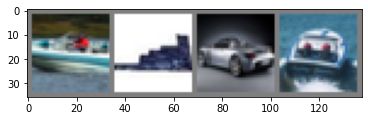

In [42]:
# %% 训练数据可视化
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 96
%matplotlib inline


def imshow(img):
    # 展示图像的函数
    img = img / 2 + 0.5  # 反向归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 获取随机数据
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示图像
imshow(torchvision.utils.make_grid(images))
# 显示图像标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 定义 CNN

In [43]:
from torch import nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### 定义损失函数与优化器

- 损失函数：CrossEntropyLoss 交叉熵损失
- 优化器：SGD with Momentum 带动量随机梯度下降

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.001
     momentum: 0.9
     nesterov: False
     weight_decay: 0
 ))

### 训练模型

有趣的训练过程开始了。只需在数据迭代器上循环，将数据输入给网络，并优化。

In [45]:
### 单次迭代 ###
running_loss = 0.0
for i, data in enumerate(trainloader, 0):
    # 获取输入
    inputs, labels = data
    # 梯度归零
    optimizer.zero_grad()
    # 正向传播
    outputs = net(inputs)
    # 计算损失
    loss = criterion(outputs, labels)
    # 反向传播
    loss.backward()
    # 模型优化
    optimizer.step()
    # 累计损失值
    running_loss += loss.item()
    if (i + 1) % 500 == 0:
        ### 500 批次产生一个输出 ###
        print('[%5d batch(s)] loss: %.3f' % (i + 1, running_loss / 200))
        running_loss = 0.0

print('模型训练完成！')

[  500 batch(s)] loss: 5.751
[ 1000 batch(s)] loss: 5.683
[ 1500 batch(s)] loss: 5.413
[ 2000 batch(s)] loss: 5.160
[ 2500 batch(s)] loss: 4.961
[ 3000 batch(s)] loss: 4.721
[ 3500 batch(s)] loss: 4.544
[ 4000 batch(s)] loss: 4.501
[ 4500 batch(s)] loss: 4.369
[ 5000 batch(s)] loss: 4.381
[ 5500 batch(s)] loss: 4.306
[ 6000 batch(s)] loss: 4.220
[ 6500 batch(s)] loss: 4.200
[ 7000 batch(s)] loss: 4.007
[ 7500 batch(s)] loss: 4.009
[ 8000 batch(s)] loss: 3.897
[ 8500 batch(s)] loss: 3.821
[ 9000 batch(s)] loss: 3.840
[ 9500 batch(s)] loss: 3.765
[10000 batch(s)] loss: 3.647
[10500 batch(s)] loss: 3.610
[11000 batch(s)] loss: 3.719
[11500 batch(s)] loss: 3.564
[12000 batch(s)] loss: 3.546
[12500 batch(s)] loss: 3.601
模型训练完成！


### 在测试集上测试网络

我们在整个训练集上进行了训练，但是需要检查网络是否从数据集中学习到有用的东西。一般情况下，可以通过预测神经网络输出的类别标签与实际情况标签进行对比来进行检测。如果预测正确，我们把该样本添加到正确预测列表。

GroundTruth:    cat  ship  ship plane


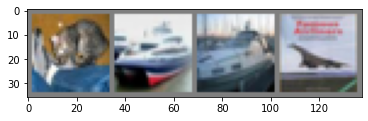

In [46]:
dataiter = iter(testloader)
images, labels = dataiter.next()

### 显示图片 ###
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [47]:
# %% 输出各类别的分类权重
outputs = net(images)
outputs

tensor([[-0.7713, -2.0576,  0.8677,  2.4446, -0.4597,  1.4322,  0.6000, -0.9591,
         -0.1338, -1.6575],
        [ 3.6527,  5.3121, -2.3105, -2.8738, -2.5706, -4.4261, -3.6144, -5.1636,
          6.0998,  3.5998],
        [ 2.3286,  1.5838, -0.5715, -1.3460, -1.0085, -2.1667, -1.9451, -2.3951,
          3.1994,  0.8614],
        [ 2.9937,  1.1516, -0.6704, -1.3929, -0.6127, -2.9027, -1.7027, -3.3161,
          4.0858,  0.2326]], grad_fn=<AddmmBackward0>)

In [48]:
# %% 获取权重最大的索引，转换为类别
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [49]:
# %% 关闭梯度跟踪，在测试集上评估模型
correct, total = 0, 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d%%' %
      (100 * correct / total))

Accuracy of the network on the 10000 test images: 48%


在最近一次评估中，模型准确率达到 $48\%$ ，高于随机选择的 $10\%$ 。

In [50]:
# %% 获取模型在测试集不同类别上的准确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d%%' %
          (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43%
Accuracy of   car : 57%
Accuracy of  bird : 42%
Accuracy of   cat : 43%
Accuracy of  deer : 27%
Accuracy of   dog : 45%
Accuracy of  frog : 67%
Accuracy of horse : 35%
Accuracy of  ship : 76%
Accuracy of truck : 45%


## 实验总结

本次实验对 PyTorch 的使用进行了介绍，了解了其基本概念以及核心的运行机制。你需要对张量、基本运算、自动求导等有所掌握。除此之外，我们利用 PyTorch 构建了人工神经网络模型并完成训练，关于损失函数、优化器等组件的更多细节，需要你利用官方文档进一步学习。